In [1]:
import re

def extract_policy_and_number(log_file):
    policy_number_list = []
    with open(log_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Extract lines containing overall latency
            if 'Overall Latency' in line:
                match = re.search(r'Params=\((.+?), (.+?), (.+?), DataParallelRuntimeSelectionPolicy.(.+?)\) Overall Latency: (.*)', line)
                if match:
                    policy_number_list.append({
                        "num_different_long_prefix": int(match.group(1)),
                        "percent_random_prefixes": float(match.group(2)),
                        "num_requests": int(match.group(3)),
                        "policy": match.group(4),
                        "latency": float(match.group(5))
                    })
    return policy_number_list

log_file = 'consistency_experiment.log'
result = extract_policy_and_number(log_file)
print(result)
import pandas as pd
df = pd.DataFrame(result)
df_long_prefix_10_0_2_256 = df
# 10, 0.2, 256


[{'num_different_long_prefix': 10, 'percent_random_prefixes': 0.2, 'num_requests': 256, 'policy': 'RANDOM', 'latency': 8.737026453018188}, {'num_different_long_prefix': 10, 'percent_random_prefixes': 0.2, 'num_requests': 256, 'policy': 'RANDOM', 'latency': 6.504897356033325}, {'num_different_long_prefix': 10, 'percent_random_prefixes': 0.2, 'num_requests': 256, 'policy': 'RANDOM', 'latency': 6.759079217910767}, {'num_different_long_prefix': 10, 'percent_random_prefixes': 0.2, 'num_requests': 256, 'policy': 'RANDOM', 'latency': 6.883962392807007}, {'num_different_long_prefix': 10, 'percent_random_prefixes': 0.2, 'num_requests': 256, 'policy': 'RANDOM', 'latency': 7.087654113769531}, {'num_different_long_prefix': 10, 'percent_random_prefixes': 0.2, 'num_requests': 256, 'policy': 'RANDOM', 'latency': 6.948582649230957}, {'num_different_long_prefix': 10, 'percent_random_prefixes': 0.2, 'num_requests': 256, 'policy': 'RANDOM', 'latency': 7.967123508453369}, {'num_different_long_prefix': 10,

<Figure size 1000x600 with 0 Axes>

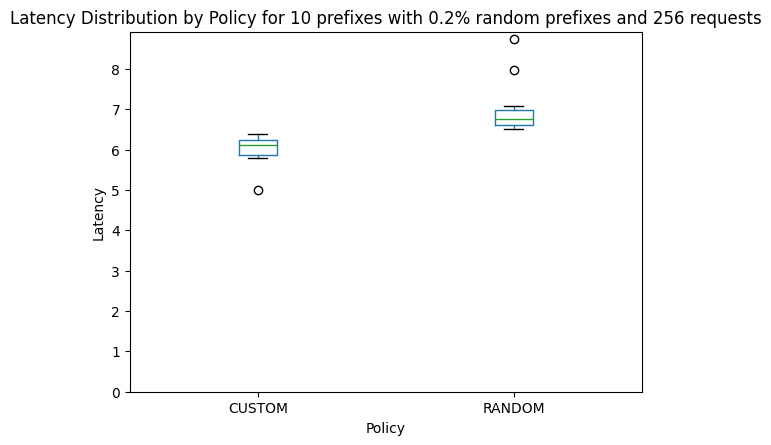

,num_different_long_prefix,percent_random_prefixes,num_requests,policy,latency
0,10,0.2,256,RANDOM,8.737026
1,10,0.2,256,RANDOM,6.504897
2,10,0.2,256,RANDOM,6.759079
3,10,0.2,256,RANDOM,6.883962
4,10,0.2,256,RANDOM,7.087654
5,10,0.2,256,RANDOM,6.948583
6,10,0.2,256,RANDOM,7.967124
7,10,0.2,256,CUSTOM,6.390239
8,10,0.2,256,RANDOM,6.552148
9,10,0.2,256,CUSTOM,6.266928


In [2]:
import matplotlib.pyplot as plt

# Group by Policy and calculate mean and standard deviation
grouped = df.groupby('policy')['latency'].agg(['mean', 'std'])

# Plot scatter plot with error bars
# Plot box and whisker plot
plt.figure(figsize=(10, 6))
df.boxplot(column='latency', by='policy', grid=False)
plt.xlabel('Policy')
plt.ylabel('Latency')
plt.title('Latency Distribution by Policy for 10 prefixes with 0.2% random prefixes and 256 requests')
plt.suptitle('')
plt.ylim(0)

plt.show()
# grouped['RANDOM']/grouped['CUSTOM']

df

[{'num_different_long_prefix': 2, 'percent_random_prefixes': 0.0, 'num_requests': 1024, 'policy': 'RANDOM', 'latency': 5.79144024848938}, {'num_different_long_prefix': 2, 'percent_random_prefixes': 0.0, 'num_requests': 1024, 'policy': 'CUSTOM', 'latency': 6.461093425750732}, {'num_different_long_prefix': 200, 'percent_random_prefixes': 0.0, 'num_requests': 1024, 'policy': 'RANDOM', 'latency': 36.9400269985199}, {'num_different_long_prefix': 200, 'percent_random_prefixes': 0.0, 'num_requests': 1024, 'policy': 'CUSTOM', 'latency': 35.716490507125854}, {'num_different_long_prefix': 2, 'percent_random_prefixes': 0.2, 'num_requests': 1024, 'policy': 'RANDOM', 'latency': 9.350439310073853}, {'num_different_long_prefix': 2, 'percent_random_prefixes': 0.2, 'num_requests': 1024, 'policy': 'CUSTOM', 'latency': 9.726104497909546}, {'num_different_long_prefix': 10, 'percent_random_prefixes': 0.2, 'num_requests': 1024, 'policy': 'RANDOM', 'latency': 13.535648345947266}, {'num_different_long_prefix'

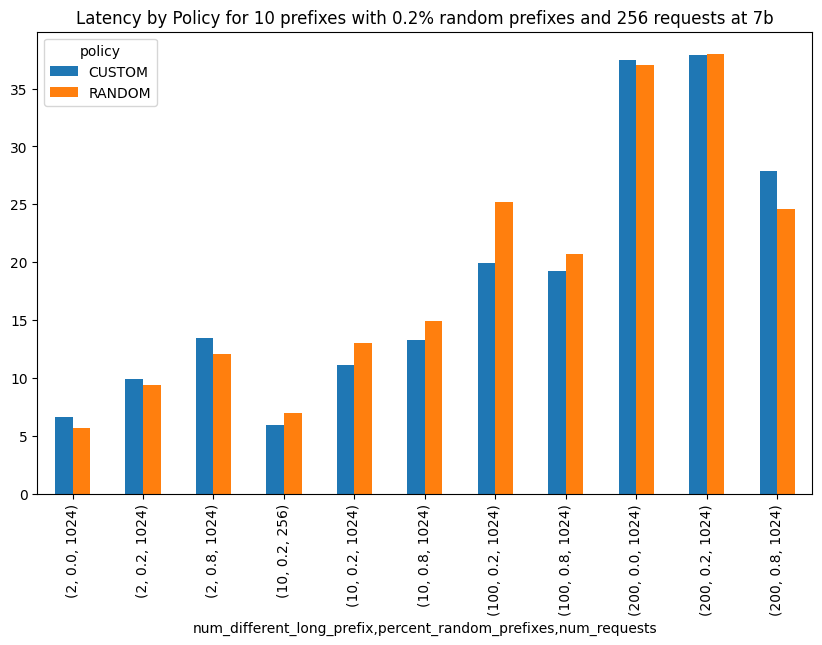

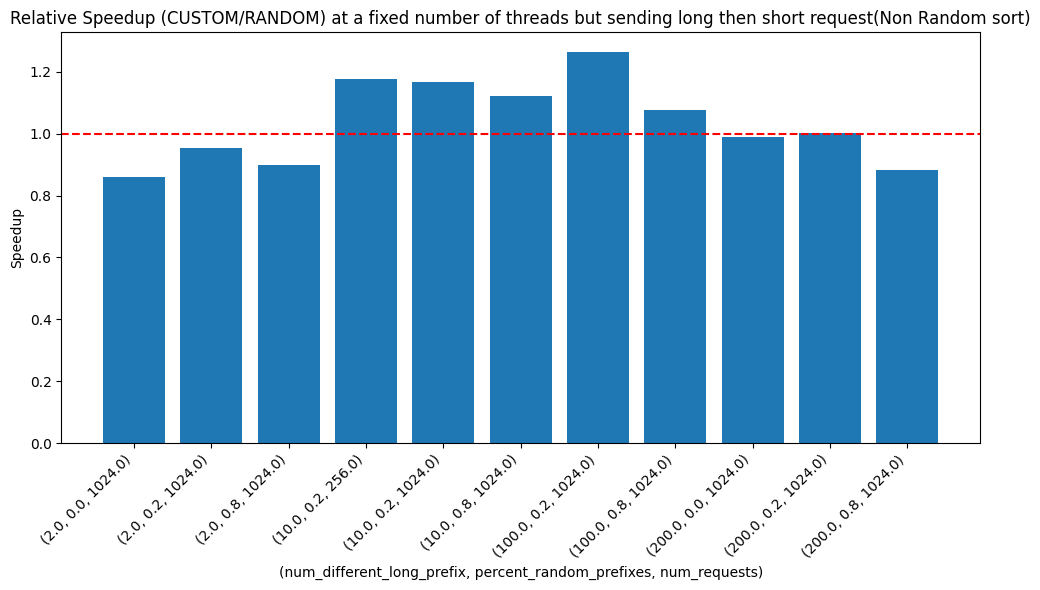

In [6]:
import re

def extract_policy_and_number(log_file):
    policy_number_list = []
    with open(log_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Extract lines containing overall latency
            if 'Overall Latency' in line:
                match = re.search(r'Params=\((.+?), (.+?), (.+?), DataParallelRuntimeSelectionPolicy.(.+?)\) Overall Latency: (.*)', line)
                if match:
                    policy_number_list.append({
                        "num_different_long_prefix": int(match.group(1)),
                        "percent_random_prefixes": float(match.group(2)),
                        "num_requests": int(match.group(3)),
                        "policy": match.group(4),
                        "latency": float(match.group(5))
                    })
    return policy_number_list

log_file = 'full_exp.log'
result = extract_policy_and_number(log_file)
print(result)
import pandas as pd
df = pd.DataFrame(result)

df = pd.merge(df, df_long_prefix_10_0_2_256,  how='outer')
df = df.groupby(['num_different_long_prefix', 'percent_random_prefixes', 'num_requests', 'policy'])['latency'].mean().unstack()
df.plot(kind='bar', figsize=(10, 6), title='Latency by Policy for 10 prefixes with 0.2% random prefixes and 256 requests at 7b')

df["Speedup"] = df["RANDOM"] / df["CUSTOM"]
df = df.reset_index()

# Calculate the relative speedup
# Generate labels for x-axis
labels = df.apply(lambda x: f'({x["num_different_long_prefix"]}, {x["percent_random_prefixes"]}, {x["num_requests"]})', axis=1)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, df['Speedup'])
plt.title('Relative Speedup (CUSTOM/RANDOM) at a fixed number of threads but sending long then short request(Non Random sort)')
plt.xlabel('(num_different_long_prefix, percent_random_prefixes, num_requests)')
plt.ylabel('Speedup')
ax.axhline(y=1.0, color='r', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



[{'num_different_long_prefix': 2, 'percent_random_prefixes': 0.0, 'num_requests': 1024, 'policy': 'RANDOM', 'latency': 5.6624345779418945}, {'num_different_long_prefix': 2, 'percent_random_prefixes': 0.0, 'num_requests': 1024, 'policy': 'CUSTOM', 'latency': 6.596557378768921}, {'num_different_long_prefix': 200, 'percent_random_prefixes': 0.0, 'num_requests': 1024, 'policy': 'RANDOM', 'latency': 35.10253596305847}, {'num_different_long_prefix': 200, 'percent_random_prefixes': 0.0, 'num_requests': 1024, 'policy': 'CUSTOM', 'latency': 38.271838903427124}, {'num_different_long_prefix': 2, 'percent_random_prefixes': 0.2, 'num_requests': 1024, 'policy': 'RANDOM', 'latency': 11.426652669906616}, {'num_different_long_prefix': 2, 'percent_random_prefixes': 0.2, 'num_requests': 1024, 'policy': 'CUSTOM', 'latency': 12.225459814071655}, {'num_different_long_prefix': 10, 'percent_random_prefixes': 0.2, 'num_requests': 1024, 'policy': 'RANDOM', 'latency': 12.593090772628784}, {'num_different_long_pr

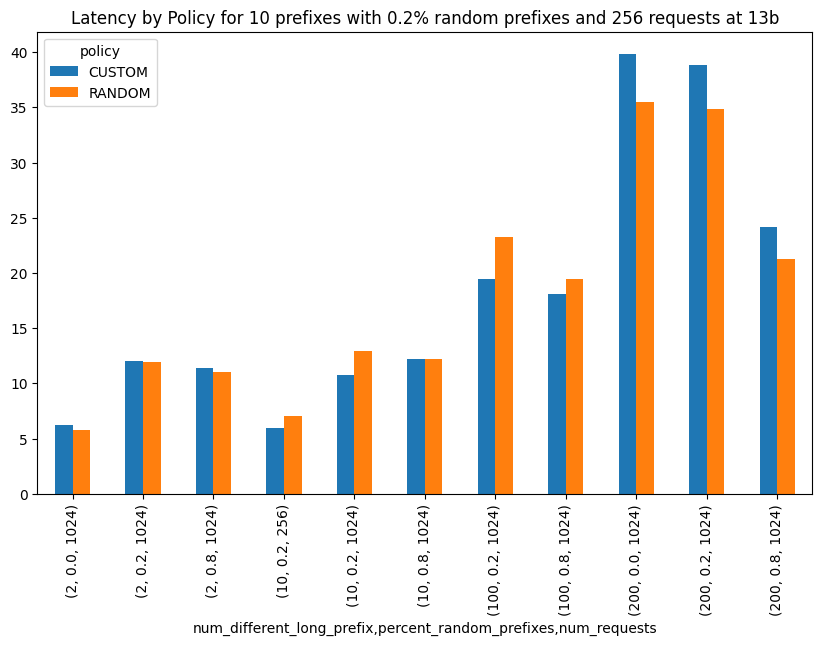

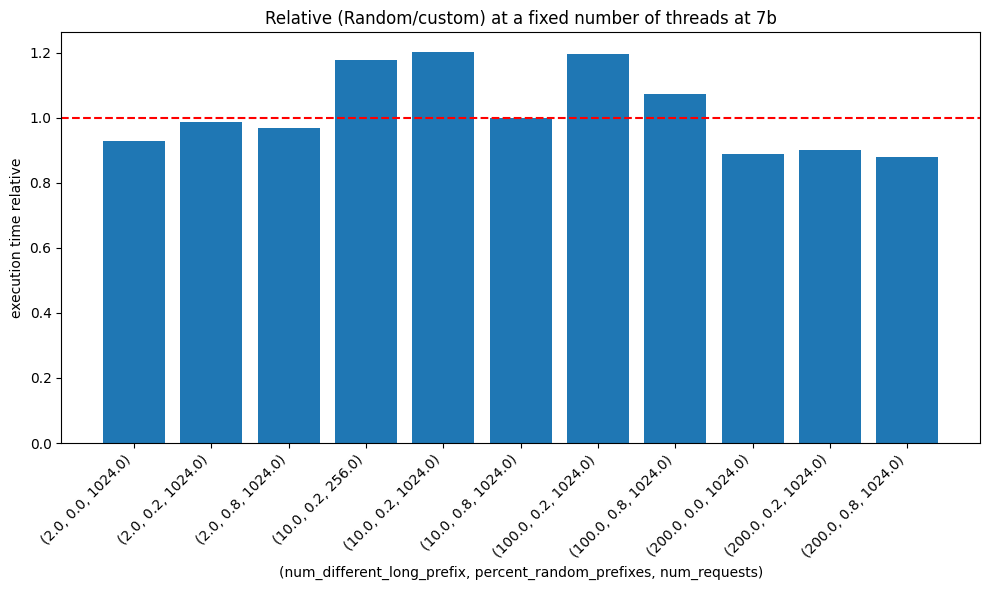

In [7]:
import re

def extract_policy_and_number(log_file):
    policy_number_list = []
    with open(log_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Extract lines containing overall latency
            if 'Overall Latency' in line:
                match = re.search(r'Params=\((.+?), (.+?), (.+?), DataParallelRuntimeSelectionPolicy.(.+?)\) Overall Latency: (.*)', line)
                if match:
                    policy_number_list.append({
                        "num_different_long_prefix": int(match.group(1)),
                        "percent_random_prefixes": float(match.group(2)),
                        "num_requests": int(match.group(3)),
                        "policy": match.group(4),
                        "latency": float(match.group(5))
                    })
    return policy_number_list

log_file = 'full_exp_with_randomly_shuffled.log'
result = extract_policy_and_number(log_file)
print(result)
import pandas as pd
df = pd.DataFrame(result)

df = pd.merge(df, df_long_prefix_10_0_2_256,  how='outer')
df = df.groupby(['num_different_long_prefix', 'percent_random_prefixes', 'num_requests', 'policy'])['latency'].mean().unstack()
df.plot(kind='bar', figsize=(10, 6), title='Latency by Policy for 10 prefixes with 0.2% random prefixes and 256 requests at 13b')

df["Speedup"] = df["RANDOM"] / df["CUSTOM"]
df = df.reset_index()

# Calculate the relative speedup
# Generate labels for x-axis
labels = df.apply(lambda x: f'({x["num_different_long_prefix"]}, {x["percent_random_prefixes"]}, {x["num_requests"]})', axis=1)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, df['Speedup'])
plt.title('Relative (Random/custom) at a fixed number of threads at 7b')
plt.xlabel('(num_different_long_prefix, percent_random_prefixes, num_requests)')
plt.ylabel('execution time relative')
ax.axhline(y=1.0, color='r', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

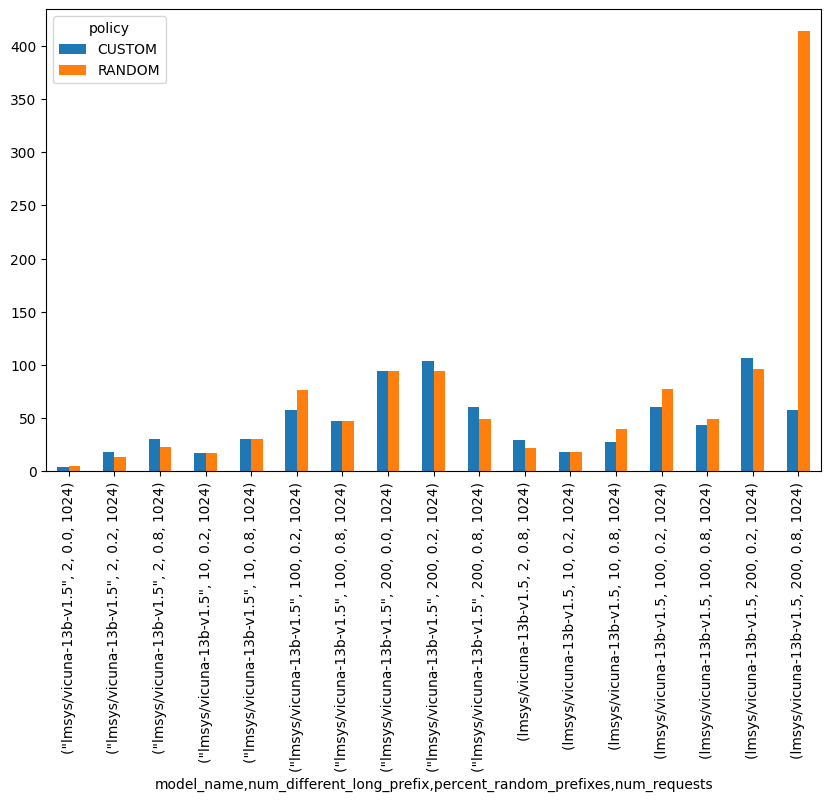

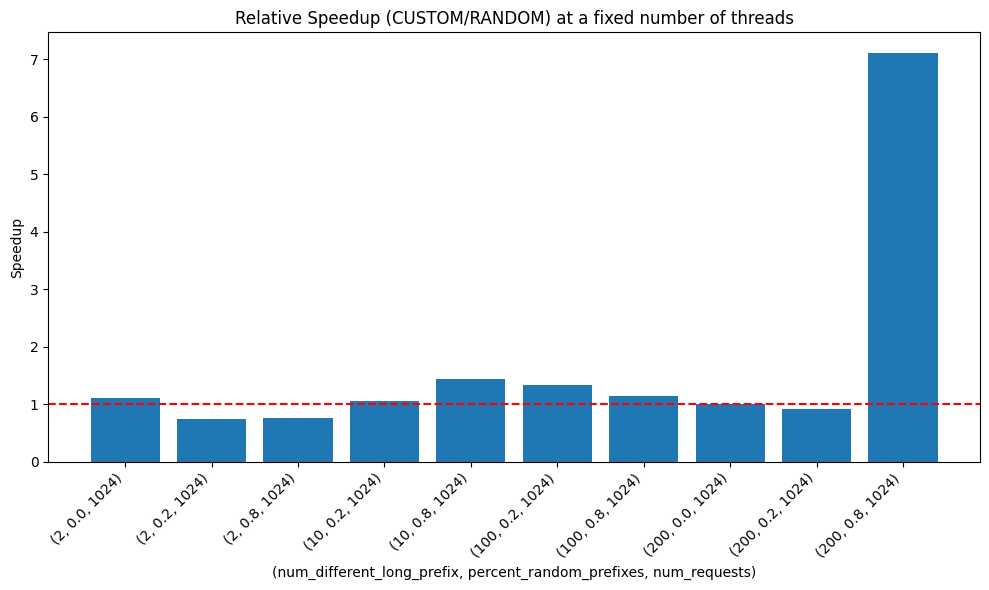

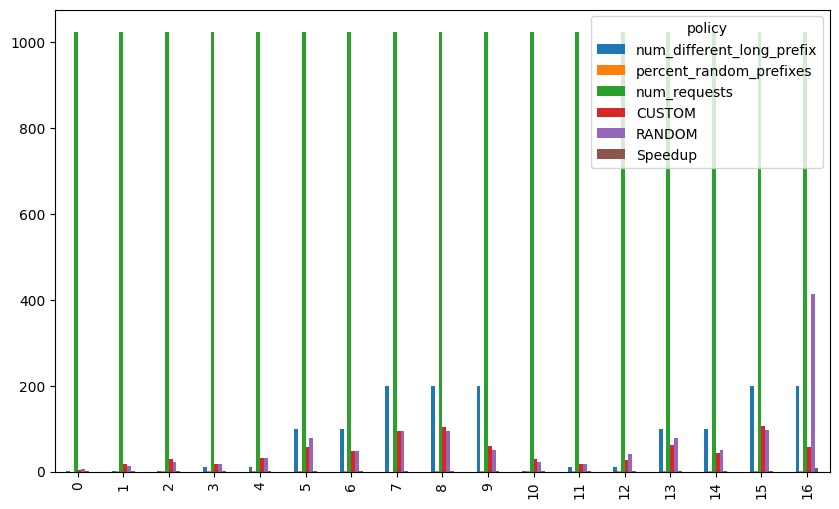

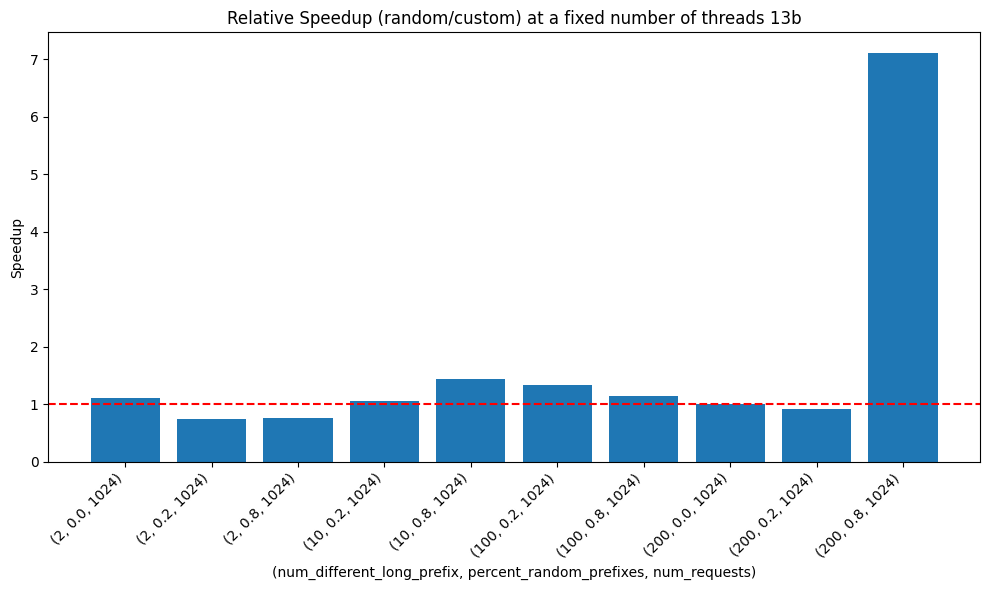

In [5]:
import re

def extract_policy_and_number(log_file):
    overall_latencies = []
    request_latencies = []
    with open(log_file, 'r') as f:
        lines = f.readlines()
        for line in lines:
            # Extract lines containing overall latency
            if 'Overall Latency' in line:
                match = re.search(r'Params=\((.+?), (.+?), (.+?), (.+?), DataParallelRuntimeSelectionPolicy.(.+?)\) Overall Latency: (.*)', line)
                if match:
                    overall_latencies.append({
                        "model_name": match.group(1),
                        "num_different_long_prefix": int(match.group(2)),
                        "percent_random_prefixes": float(match.group(3)),
                        "num_requests": int(match.group(4)),
                        "policy": match.group(5),
                        "latency": float(match.group(6))
                    })
            elif "Overall Request Latency:" in line:
                match = re.search(r'Params=\((.+?), (.+?), (.+?), (.+?), DataParallelRuntimeSelectionPolicy.(.+?)\) Overall Request Latency: (.*), STD: (.*), P90: (.*)', line)
                if match:
                    request_latencies.append({
                        "model_name": match.group(1),
                        "num_different_long_prefix": int(match.group(2)),
                        "percent_random_prefixes": float(match.group(3)),
                        "num_requests": int(match.group(4)),
                        "policy": match.group(5),
                        "avg_latency": float(match.group(6)),
                        "std": float(match.group(7)),
                        "p90": float(match.group(8))
                    })                

    return overall_latencies, request_latencies

log_file = 'experiment_larger_model_13b.log'
result, request_latencies = extract_policy_and_number(log_file)
import pandas as pd
df = pd.DataFrame(result)
df = df.groupby(["model_name", 'num_different_long_prefix', 'percent_random_prefixes', 'num_requests', 'policy'])['latency'].mean().unstack()
df.plot(kind='bar', figsize=(10, 6))

df["Speedup"] = df["RANDOM"] / df["CUSTOM"]
df = df.reset_index()
labels = df.apply(lambda x: f'({x["num_different_long_prefix"]}, {x["percent_random_prefixes"]}, {x["num_requests"]})', axis=1)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, df['Speedup'])
plt.title('Relative Speedup (CUSTOM/RANDOM) at a fixed number of threads')
plt.xlabel('(num_different_long_prefix, percent_random_prefixes, num_requests)')
plt.ylabel('Speedup')
ax.axhline(y=1.0, color='r', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

request_latency_df = pd.DataFrame(request_latencies)
request_latency_df.groupby(["model_name", 'num_different_long_prefix', 'percent_random_prefixes', 'num_requests', 'policy']).mean().reset_index()
df.plot(kind='bar', figsize=(10, 6))

df["Speedup"] = df["RANDOM"] / df["CUSTOM"]
df = df.reset_index()
labels = df.apply(lambda x: f'({x["num_different_long_prefix"]}, {x["percent_random_prefixes"]}, {x["num_requests"]})', axis=1)

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, df['Speedup'])
plt.title('Relative Speedup (random/custom) at a fixed number of threads 13b')
plt.xlabel('(num_different_long_prefix, percent_random_prefixes, num_requests)')
plt.ylabel('Speedup')
ax.axhline(y=1.0, color='r', linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
request_latency_df = pd.DataFrame(request_latencies)
x = request_latency_df.groupby(["model_name", 'num_different_long_prefix', 'percent_random_prefixes', 'num_requests', 'policy']).mean().reset_index()
x

,model_name,num_different_long_prefix,percent_random_prefixes,num_requests,policy,avg_latency,std,p90
0,"""lmsys/vicuna-13b-v1.5""",2,0.0,1024,CUSTOM,0.884185,0.500067,1.504260
1,"""lmsys/vicuna-13b-v1.5""",2,0.0,1024,RANDOM,1.037049,0.513980,1.704937
2,"""lmsys/vicuna-13b-v1.5""",2,0.2,1024,CUSTOM,4.061856,3.277305,5.571793
3,"""lmsys/vicuna-13b-v1.5""",2,0.2,1024,RANDOM,3.065739,2.659314,6.039657
4,"""lmsys/vicuna-13b-v1.5""",2,0.8,1024,CUSTOM,6.826802,7.837107,23.218589
5,"""lmsys/vicuna-13b-v1.5""",2,0.8,1024,RANDOM,5.283424,3.741817,11.037278
6,"""lmsys/vicuna-13b-v1.5""",10,0.2,1024,CUSTOM,3.678350,3.193855,7.192358
7,"""lmsys/vicuna-13b-v1.5""",10,0.2,1024,RANDOM,4.052854,3.792670,9.095072
8,"""lmsys/vicuna-13b-v1.5""",10,0.8,1024,CUSTOM,7.492440,6.468582,17.180011
9,"""lmsys/vicuna-13b-v1.5""",10,0.8,1024,RANDOM,7.525399,5.203933,14.307642


In [ ]:
# Test with worst case prefix
# Investigation the cache hits a bit more/eviction(why we perform worse than other system)
#     always re-compute the prefix? 
